In [159]:
# Installing Libraries
# !pip -q install pandas openpyxl matplotlib transformers "numpy<2" torch==2.3.0 nltk squarify spacy vaderSentiment

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.reset_option('all')

print('test')

test


C:\Users\royle\AppData\Local\Temp\ipykernel_20584\3425821460.py:9: FutureWarning: data_manager option is deprecated and will be removed in a future version. Only the BlockManager will be available.
  pd.reset_option('all')
C:\Users\royle\AppData\Local\Temp\ipykernel_20584\3425821460.py:9: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')


In [169]:
# Load xlsx into df
# runtime ~45s

# Define file paths
# filepath1 = r"Raw Web Reviews 2023-2024.xlsx"
filepath2 = r"Combined Survey+Web review.xlsx"

# Read the Excel files into DataFrames
# raw_df = pd.read_excel(filepath1, dtype=str)
# raw_df.count()                                # 48,404 records
# raw_df['Verbatim Text'].nunique()             # 41,365 unique text reviews
# raw_df['Product Name'].nunique()              # 185 unique products
# raw_df['Product Number (SKU)'].nunique()      # 185 unique product number SKUs
# raw_df['Review Source'].nunique()             # 10 unique review source
# raw_df['Ink Supply Type'].nunique()           # 2 Ink Supply Type; IIC (Ink-In-Cap) & IPH (Ink Per Head)

combined_df_wdupes = pd.read_excel(filepath2, dtype=str).sort_values(by='Survey ID')

# Function to count tokens in each row, handling non-string values
def count_tokens(text):
    if isinstance(text, str):  # Only process string values
        return len(text.split())
    return 0  # Return 0 for non-string or NaN values

# Apply the function to the text column
combined_df_wdupes['token_count'] = combined_df_wdupes['Combined Text'].apply(count_tokens)

# Convert datetime to mmm-yy format
combined_df_wdupes['Month of Response Date'] = pd.to_datetime(combined_df_wdupes['Month of Response Date'])
combined_df_wdupes['Month of Response Date'] = combined_df_wdupes['Month of Response Date'].dt.strftime('%b-%y')

# Show all columns
pd.set_option('display.max_columns', None)

combined_df_wdupes.head(5)

TypeError: 'StringMethods' object is not callable

In [161]:
# No. of Unique Survey ID (96,031)
combined_df_wdupes['Survey ID'].nunique()

96031

In [162]:
# Filter relevant columns
filtered_columns = '''
Survey ID
Product Name
Print Customer Region
LTR
Source Type
Survey language
Review Source
Star Rating
Product Family
Supplies Family
Printer Family
Model Name
Combined Text
Ink Supply Type
predicted_level1
token_count
Month of Response Date
'''.strip().splitlines()

filtered_combined_df_wdupes = combined_df_wdupes[filtered_columns].drop_duplicates()

# Replace null with 'null'
filtered_combined_df_wdupes[filtered_columns] = filtered_combined_df_wdupes[filtered_columns].fillna('null')

# Check for null values
filtered_combined_df_wdupes[filtered_columns].isnull().sum()


Survey ID                 0
Product Name              0
Print Customer Region     0
LTR                       0
Source Type               0
Survey language           0
Review Source             0
Star Rating               0
Product Family            0
Supplies Family           0
Printer Family            0
Model Name                0
Combined Text             0
Ink Supply Type           0
predicted_level1          0
token_count               0
Response Date             0
Month of Response Date    0
dtype: int64

In [168]:
# Group by and Aggregate 
# Export as csv

key_columns = '''
Survey ID
Product Name
Print Customer Region
LTR
Source Type
Survey language
Review Source
Star Rating
Product Family
Supplies Family
Printer Family
Model Name
Combined Text
Ink Supply Type
token_count
Response Date
Month of Response Date
'''.strip().splitlines()

aggregate_column = 'predicted_level1'

combined_df_output = filtered_combined_df_wdupes.groupby(key_columns, as_index=False).agg({aggregate_column: ', '.join})
combined_df_output.to_csv('Combined_df.csv', index=False)

len(combined_df_output)

96957

In [143]:
# Count occurrences of each unique Survey ID
survey_id_counts = combined_df_output['Survey ID'].value_counts().reset_index()

# Rename the columns for clarity
survey_id_counts.columns = ['Survey ID', 'Count']

# Sort by Count of Survey ID
survey_id_counts[survey_id_counts['Count'] > 1].sort_values(by='Count', ascending=False)

# 300 Survey IDs have dupes

,Survey ID,Count
0,285369438,4
2,323224928,3
3,252651947,3
4,251212419,3
5,88910279,3
...,...,...
102,320675655,2
101,181443194,2
100,184912893,2
99,181444658,2


The number of unique values in Product Name: 617

Top 10 values in Product Name:

DeskJet 2700 All-in-One Printer series	| Count: 6109	| Percentage: 3.79%
ENVY 6000 All-in-One Printer series	| Count: 4368	| Percentage: 2.71%
HP DeskJet 2755e All-in-One Printer	| Count: 4298	| Percentage: 2.67%
HP OfficeJet Pro 8025e All-in-One Printer	| Count: 3820	| Percentage: 2.37%
HP DeskJet 4155e All-in-One Printer	| Count: 3633	| Percentage: 2.25%
HP ENVY 6055e All-in-One Printer	| Count: 3217	| Percentage: 2.00%
HP OfficeJet Pro 9015e All-in-One Printer	| Count: 2918	| Percentage: 1.81%
HP OfficeJet Pro 8020 series	| Count: 2897	| Percentage: 1.80%
DeskJet 4100 All-in-One Printer series	| Count: 2860	| Percentage: 1.77%
HP ENVY 6455e All-in-One Printer	| Count: 2207	| Percentage: 1.37%


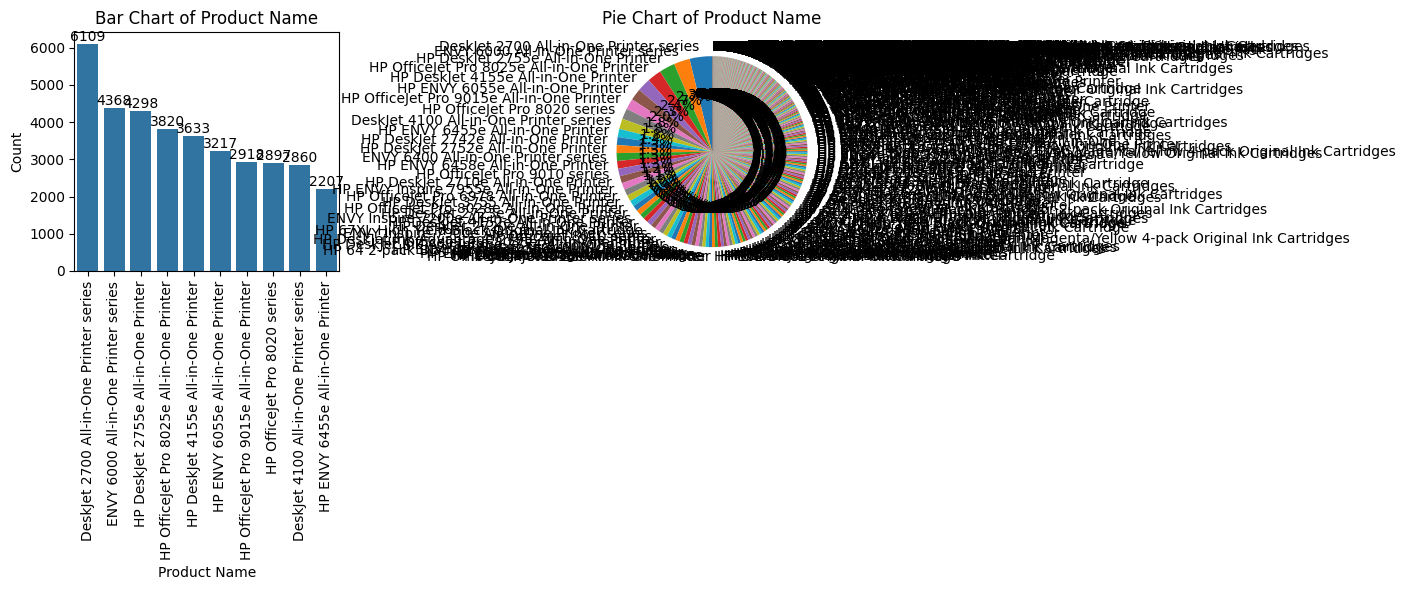

----------------------------------------------------------------------------------------------------

The number of unique values in Print Customer Region: 142

Top 10 values in Print Customer Region:

US	| Count: 101429	| Percentage: 62.95%
GB	| Count: 17697	| Percentage: 10.98%
CA	| Count: 6616	| Percentage: 4.11%
FR	| Count: 6171	| Percentage: 3.83%
DE	| Count: 5458	| Percentage: 3.39%
ES	| Count: 4128	| Percentage: 2.56%
IT	| Count: 3763	| Percentage: 2.34%
AU	| Count: 2022	| Percentage: 1.25%
BR	| Count: 2010	| Percentage: 1.25%
CN	| Count: 1532	| Percentage: 0.95%


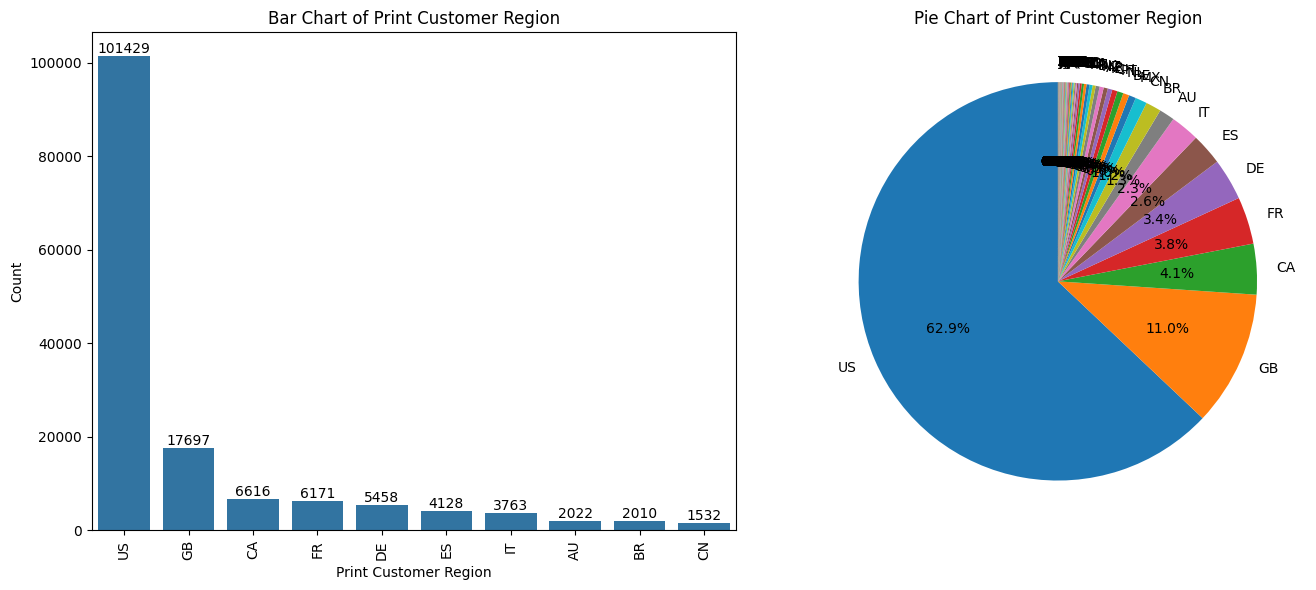

----------------------------------------------------------------------------------------------------

The number of unique values in LTR: 11

Top 10 values in LTR:

10	| Count: 46051	| Percentage: 28.58%
0	| Count: 25666	| Percentage: 15.93%
8	| Count: 15471	| Percentage: 9.60%
2	| Count: 13886	| Percentage: 8.62%
5	| Count: 10948	| Percentage: 6.79%
9	| Count: 10140	| Percentage: 6.29%
7	| Count: 8799	| Percentage: 5.46%
6	| Count: 8595	| Percentage: 5.33%
1	| Count: 8413	| Percentage: 5.22%
3	| Count: 6683	| Percentage: 4.15%


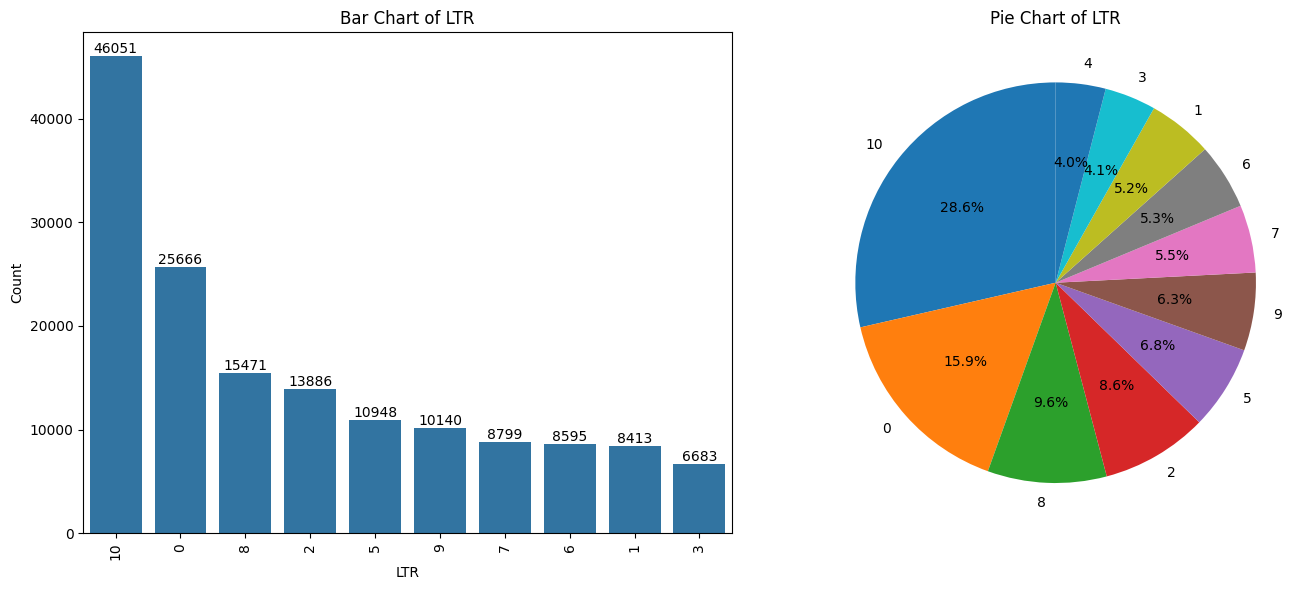

----------------------------------------------------------------------------------------------------

The number of unique values in Source Type: 2

Top 10 values in Source Type:

HPS Surveys	| Count: 126443	| Percentage: 78.47%
Web Reviews	| Count: 34690	| Percentage: 21.53%


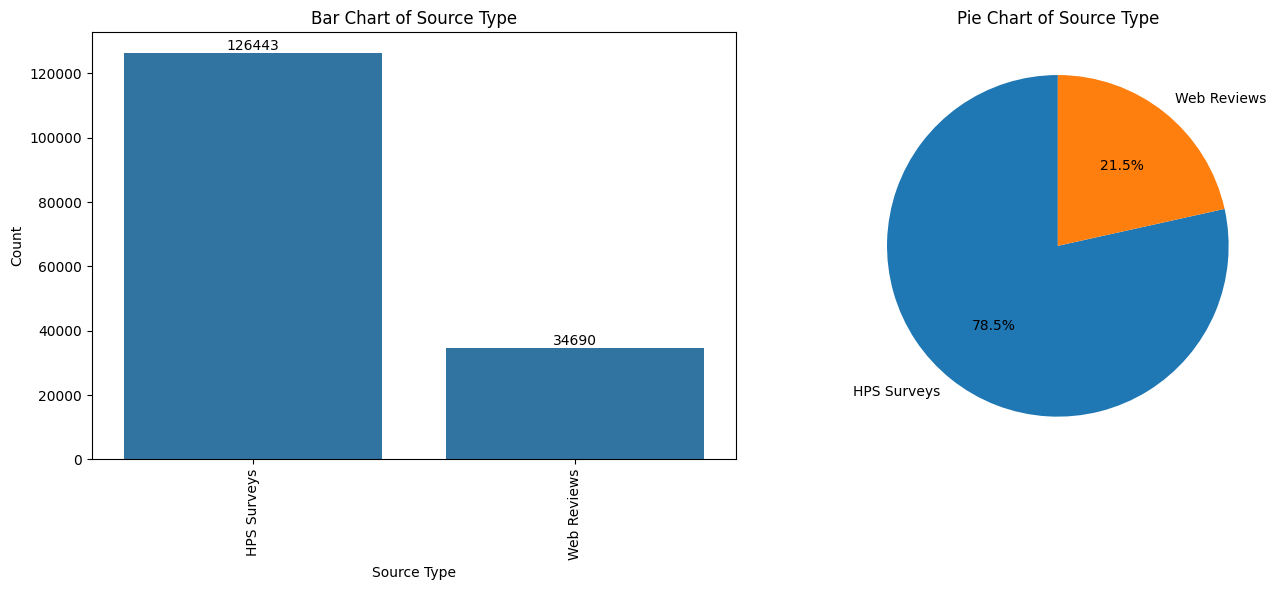

----------------------------------------------------------------------------------------------------

The number of unique values in Survey language: 13

Top 10 values in Survey language:

English	| Count: 133101	| Percentage: 82.60%
French	| Count: 6211	| Percentage: 3.85%
German	| Count: 6120	| Percentage: 3.80%
Spanish (Mexico)	| Count: 4439	| Percentage: 2.75%
Italian	| Count: 3153	| Percentage: 1.96%
Portuguese (Brazil)	| Count: 2530	| Percentage: 1.57%
Chinese (China)	| Count: 1857	| Percentage: 1.15%
French (France)	| Count: 1504	| Percentage: 0.93%
Spanish	| Count: 1291	| Percentage: 0.80%
Dutch	| Count: 619	| Percentage: 0.38%


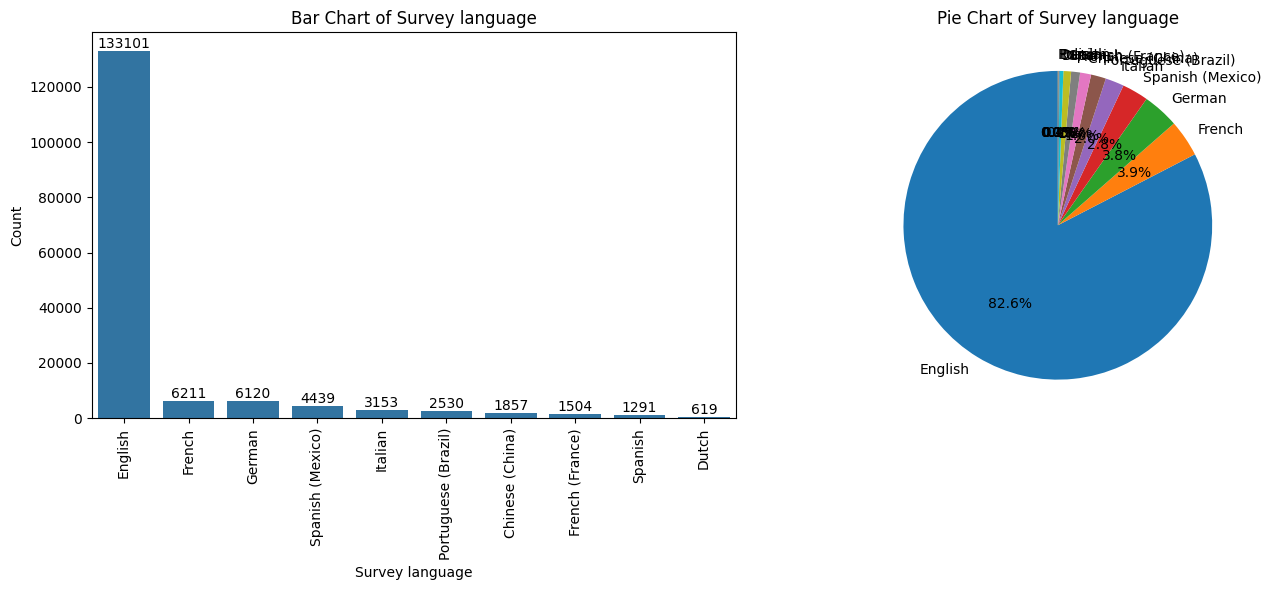

----------------------------------------------------------------------------------------------------

The number of unique values in Review Source: 10

Top 10 values in Review Source:

Amazon US	| Count: 8792	| Percentage: 25.34%
Office Depot	| Count: 5152	| Percentage: 14.85%
HP US	| Count: 4292	| Percentage: 12.37%
Walmart	| Count: 3502	| Percentage: 10.10%
Staples	| Count: 3138	| Percentage: 9.05%
Amazon IT	| Count: 2544	| Percentage: 7.33%
Amazon UK	| Count: 2138	| Percentage: 6.16%
Amazon FR	| Count: 1933	| Percentage: 5.57%
Amazon DE	| Count: 1908	| Percentage: 5.50%
Amazon ES	| Count: 1291	| Percentage: 3.72%


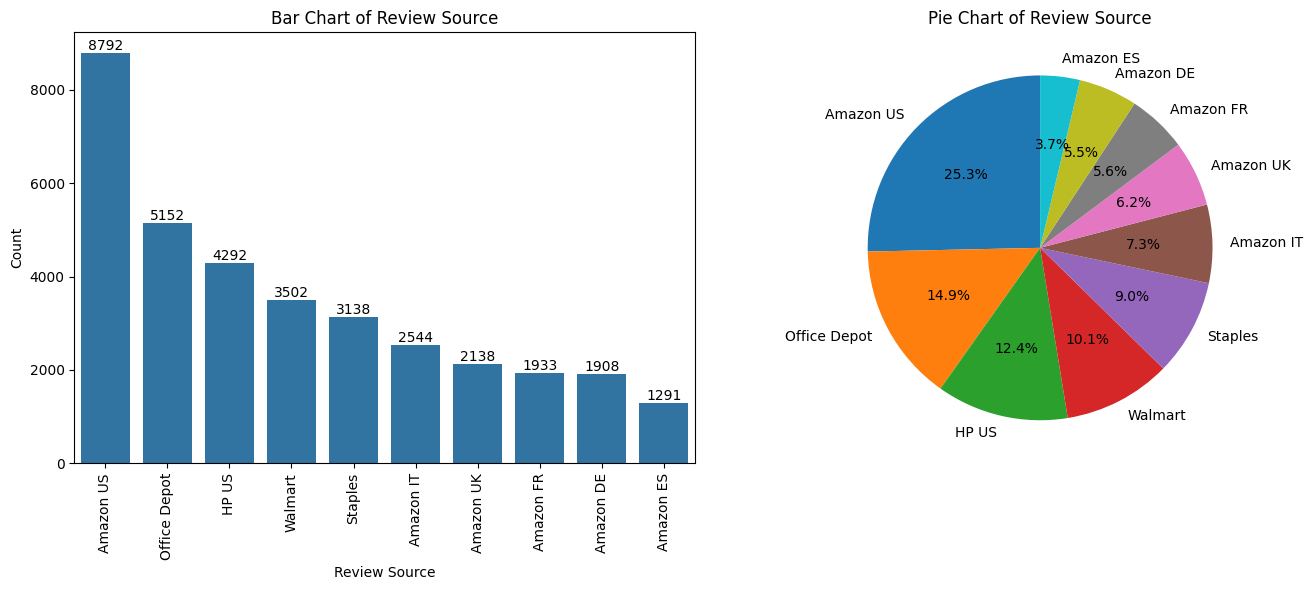

----------------------------------------------------------------------------------------------------

The number of unique values in Star Rating: 5

Top 10 values in Star Rating:

5	| Count: 21812	| Percentage: 62.88%
1	| Count: 6632	| Percentage: 19.12%
4	| Count: 3126	| Percentage: 9.01%
3	| Count: 1841	| Percentage: 5.31%
2	| Count: 1279	| Percentage: 3.69%


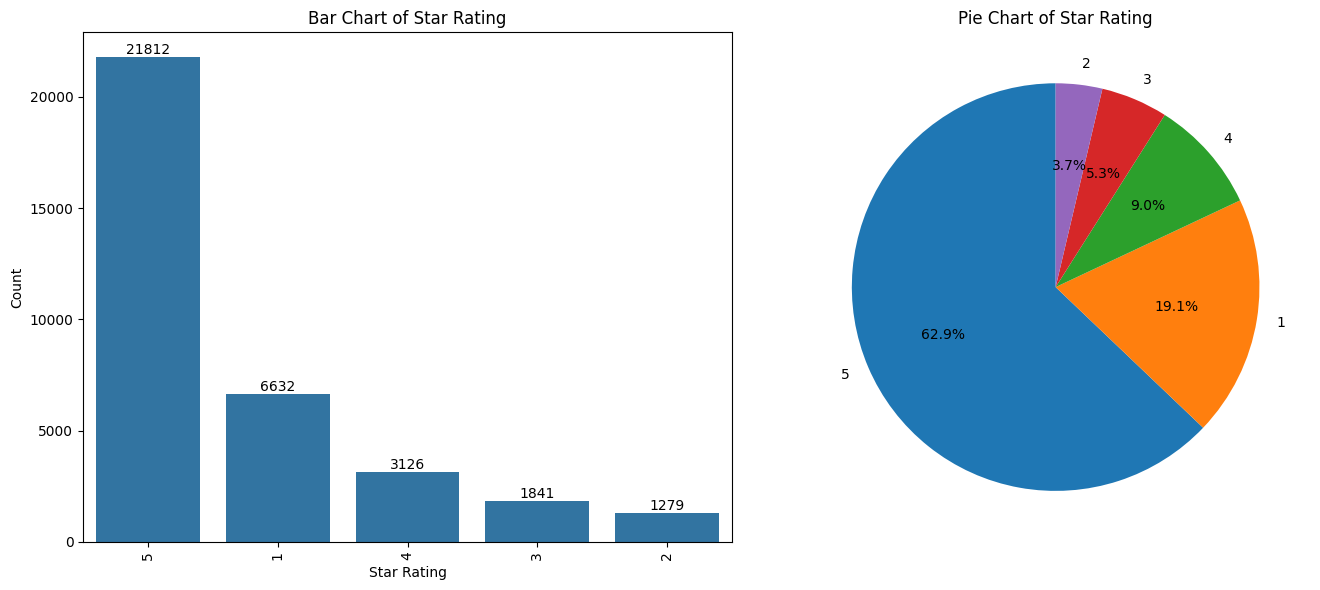

----------------------------------------------------------------------------------------------------

The number of unique values in Product Family: 1

Top 10 values in Product Family:

Supplies - Ink	| Count: 161133	| Percentage: 100.00%


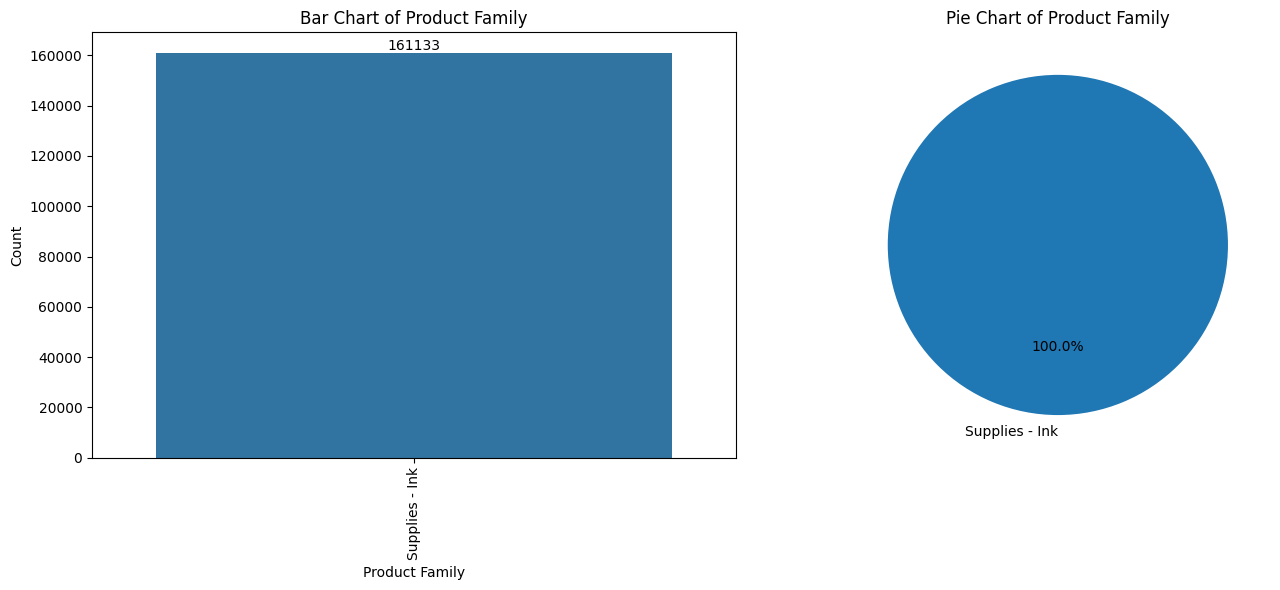

----------------------------------------------------------------------------------------------------

The number of unique values in Supplies Family: 36

Top 10 values in Supplies Family:

Obelisk	| Count: 65872	| Percentage: 40.88%
Dolmen Refresh	| Count: 17330	| Percentage: 10.76%
Cedella 	| Count: 15639	| Percentage: 9.71%
Centaur	| Count: 15355	| Percentage: 9.53%
Magnus	| Count: 10013	| Percentage: 6.21%
OBELISK	| Count: 5156	| Percentage: 3.20%
Sayan	| Count: 4468	| Percentage: 2.77%
Pyramid Refresh	| Count: 3761	| Percentage: 2.33%
Makeda	| Count: 3752	| Percentage: 2.33%
Minotaur	| Count: 2784	| Percentage: 1.73%


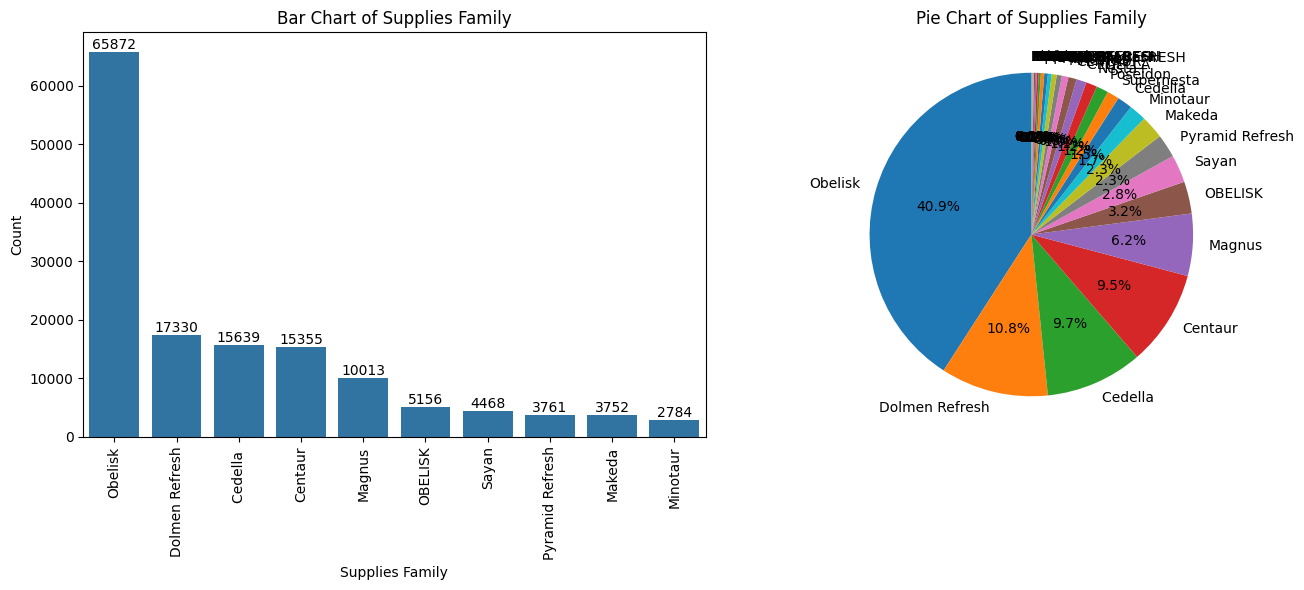

----------------------------------------------------------------------------------------------------

The number of unique values in Printer Family: 38

Top 10 values in Printer Family:

Taccola Yeti	| Count: 33124	| Percentage: 26.20%
Vasari Yeti	| Count: 19547	| Percentage: 15.46%
Malbec Yeti	| Count: 14837	| Percentage: 11.73%
Taccola	| Count: 8284	| Percentage: 6.55%
Manhattan Yeti	| Count: 7998	| Percentage: 6.33%
Novelli Yeti	| Count: 7721	| Percentage: 6.11%
Sayan	| Count: 4719	| Percentage: 3.73%
Lhasa	| Count: 4691	| Percentage: 3.71%
Palermo	| Count: 4200	| Percentage: 3.32%
Vasari	| Count: 2967	| Percentage: 2.35%


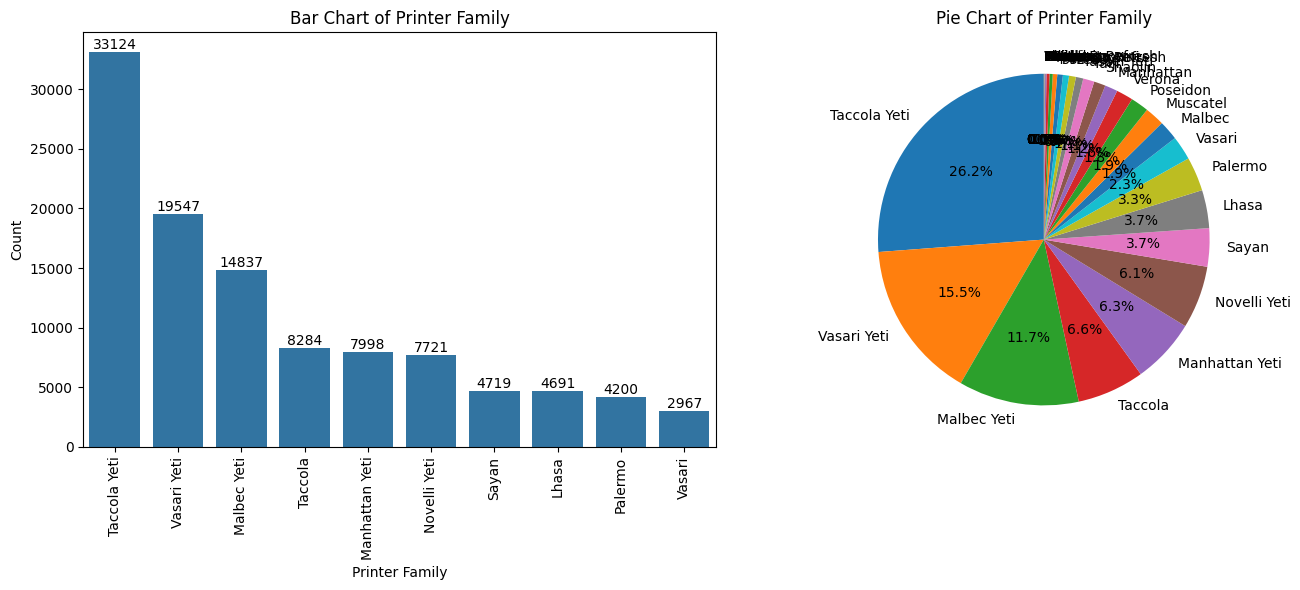

----------------------------------------------------------------------------------------------------

The number of unique values in Model Name: 603

Top 10 values in Model Name:

HP DeskJet 2755e All-in-One Printer	| Count: 5860	| Percentage: 3.64%
HP OfficeJet Pro 8025e All-in-One Printer	| Count: 5254	| Percentage: 3.26%
HP DeskJet 4155e All-in-One Printer	| Count: 4763	| Percentage: 2.96%
HP ENVY 6055e All-in-One Printer	| Count: 4397	| Percentage: 2.73%
HP OfficeJet Pro 9015e All-in-One Printer	| Count: 4295	| Percentage: 2.67%
HP ENVY 6455e All-in-One Printer	| Count: 3003	| Percentage: 1.86%
HP DeskJet 2710e All-in-One Printer	| Count: 2965	| Percentage: 1.84%
HP DeskJet 2752e All-in-One Printer	| Count: 2802	| Percentage: 1.74%
HP DeskJet 2742e All-in-One Printer	| Count: 2782	| Percentage: 1.73%
HP OfficeJet Pro 8028e All-in-One Printer	| Count: 2642	| Percentage: 1.64%


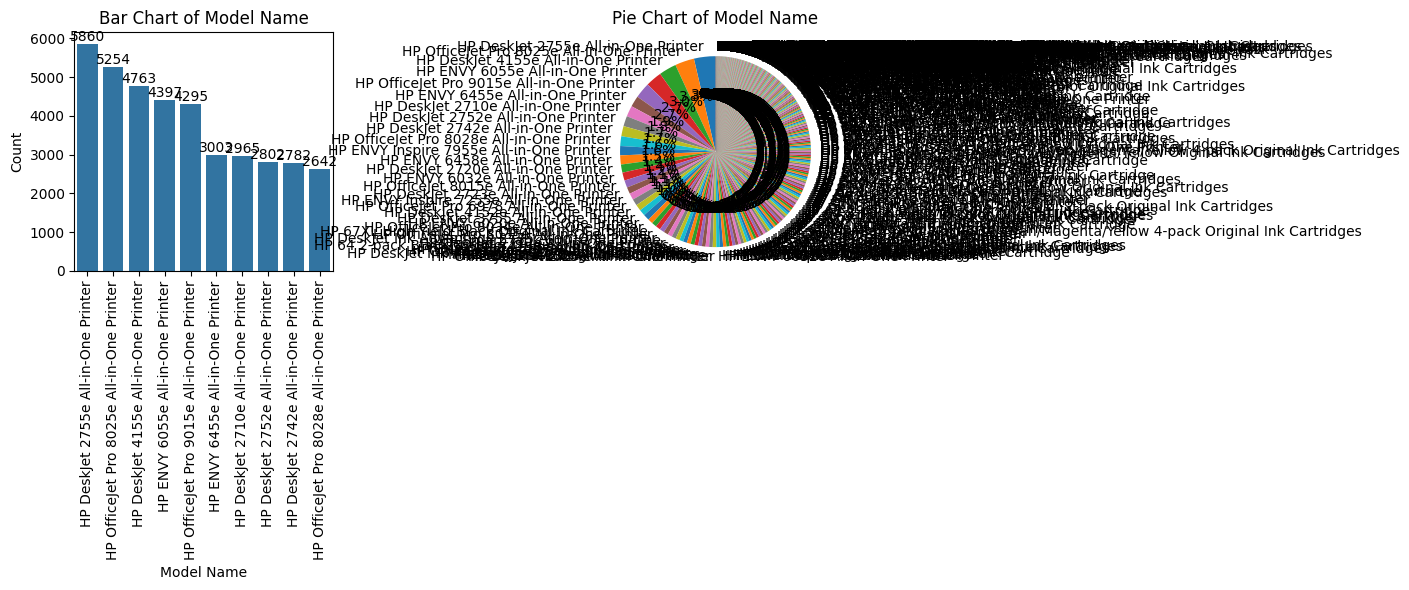

----------------------------------------------------------------------------------------------------

The number of unique values in predicted_level1: 11

Top 10 values in predicted_level1:

Others	| Count: 34365	| Percentage: 21.33%
Instant Ink related	| Count: 30114	| Percentage: 18.69%
Customer experience & expectation	| Count: 27758	| Percentage: 17.23%
Print quality	| Count: 14978	| Percentage: 9.30%
Cartridge Problem	| Count: 11709	| Percentage: 7.27%
Printer Hardware/Printing issues	| Count: 11117	| Percentage: 6.90%
Cost	| Count: 10006	| Percentage: 6.21%
General satisfied	| Count: 9934	| Percentage: 6.17%
Logistic Handling	| Count: 8900	| Percentage: 5.52%
Brand Loyalty	| Count: 1956	| Percentage: 1.21%


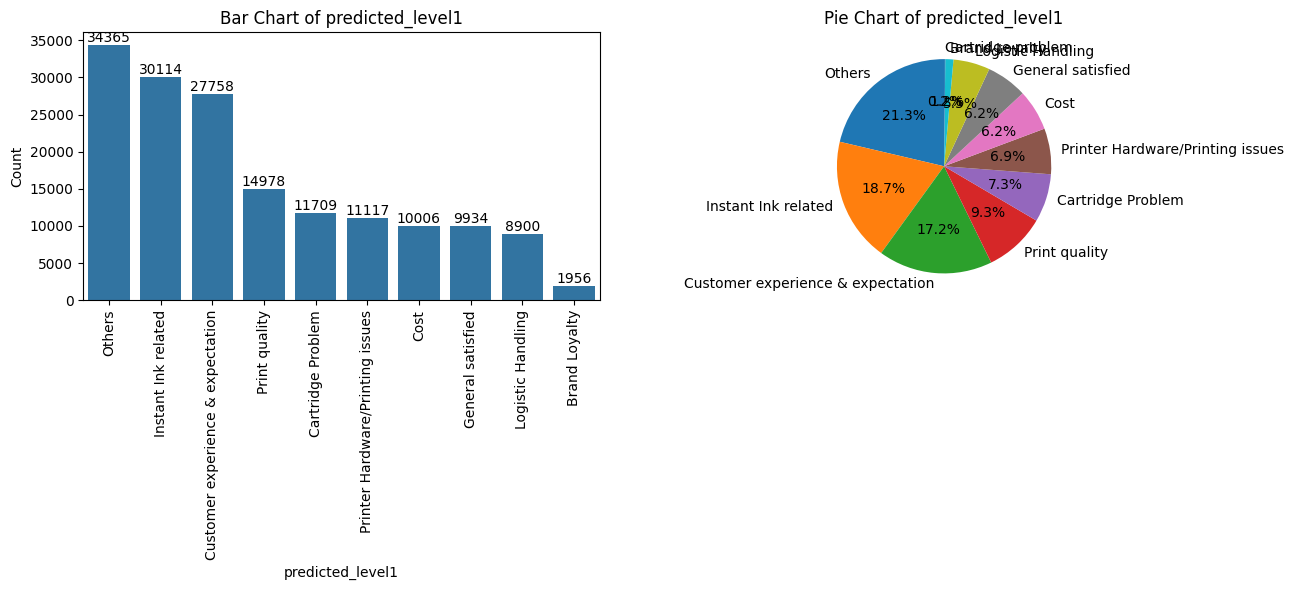

----------------------------------------------------------------------------------------------------

The number of unique values in predicted_level2: 54

Top 10 values in predicted_level2:

others	| Count: 27832	| Percentage: 17.27%
Cost	| Count: 9949	| Percentage: 6.17%
Ink/toner - General satisfied	| Count: 9934	| Percentage: 6.17%
Instant Ink - General satisfied	| Count: 8521	| Percentage: 5.29%
Print quality	| Count: 7314	| Percentage: 4.54%
Instant Ink - Misperception/dislike	| Count: 7299	| Percentage: 4.53%
HW issue	| Count: 7201	| Percentage: 4.47%
cs experience	| Count: 6622	| Percentage: 4.11%
Instant Ink - Shipment	| Count: 5432	| Percentage: 3.37%
Ink/toner - Level	| Count: 4993	| Percentage: 3.10%


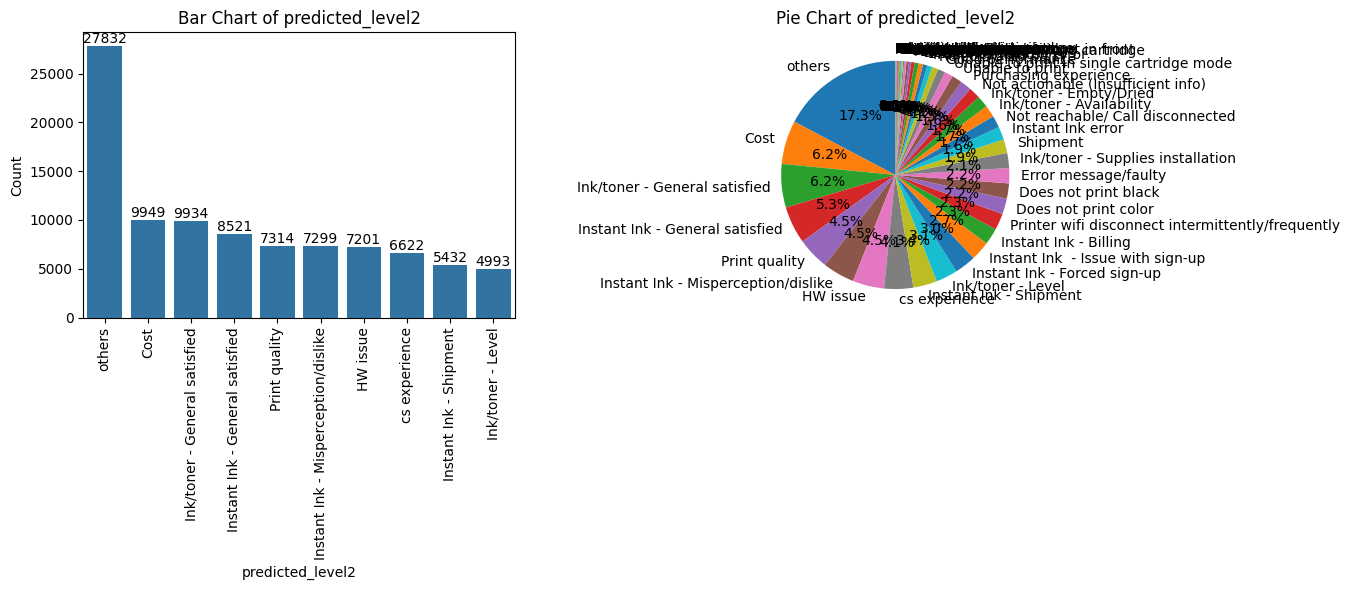

----------------------------------------------------------------------------------------------------

The number of unique values in Ink Supply Type: 3

Top 10 values in Ink Supply Type:

IPH	| Count: 105231	| Percentage: 70.05%
IIC	| Count: 37137	| Percentage: 24.72%
CISS	| Count: 7853	| Percentage: 5.23%


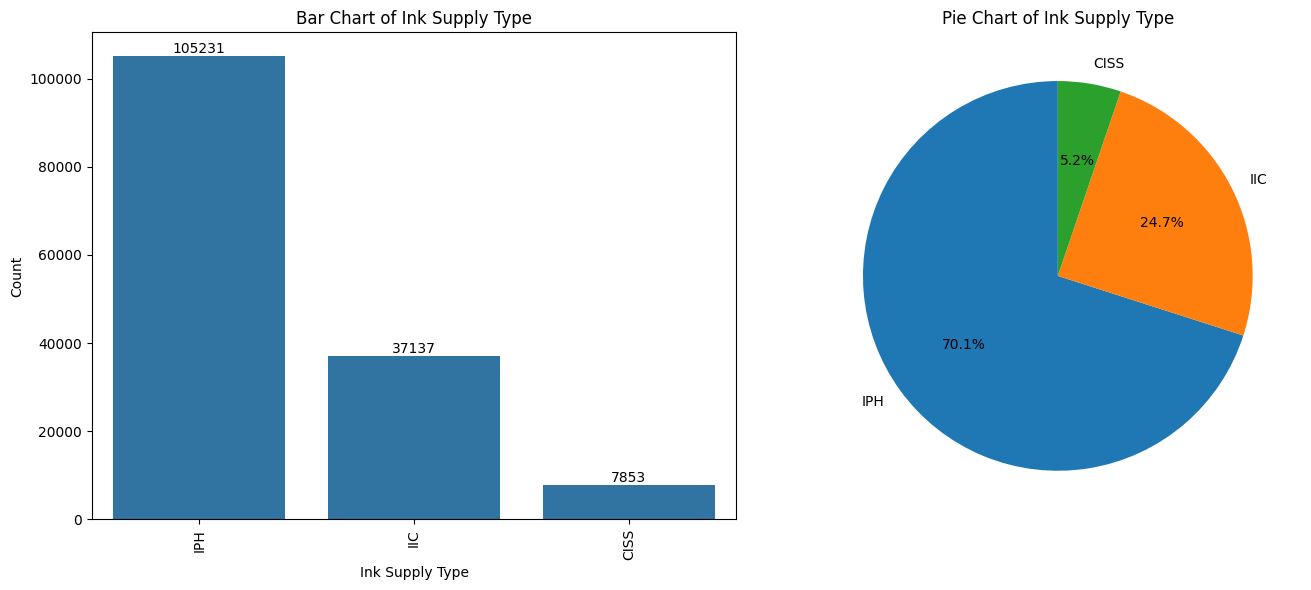

----------------------------------------------------------------------------------------------------

The number of unique values in token_count: 454

Top 10 values in token_count:

10	| Count: 3356	| Percentage: 2.08%
11	| Count: 3343	| Percentage: 2.07%
9	| Count: 3308	| Percentage: 2.05%
12	| Count: 3289	| Percentage: 2.04%
8	| Count: 3242	| Percentage: 2.01%
6	| Count: 3217	| Percentage: 2.00%
13	| Count: 3199	| Percentage: 1.99%
7	| Count: 3106	| Percentage: 1.93%
5	| Count: 3035	| Percentage: 1.88%
15	| Count: 3013	| Percentage: 1.87%


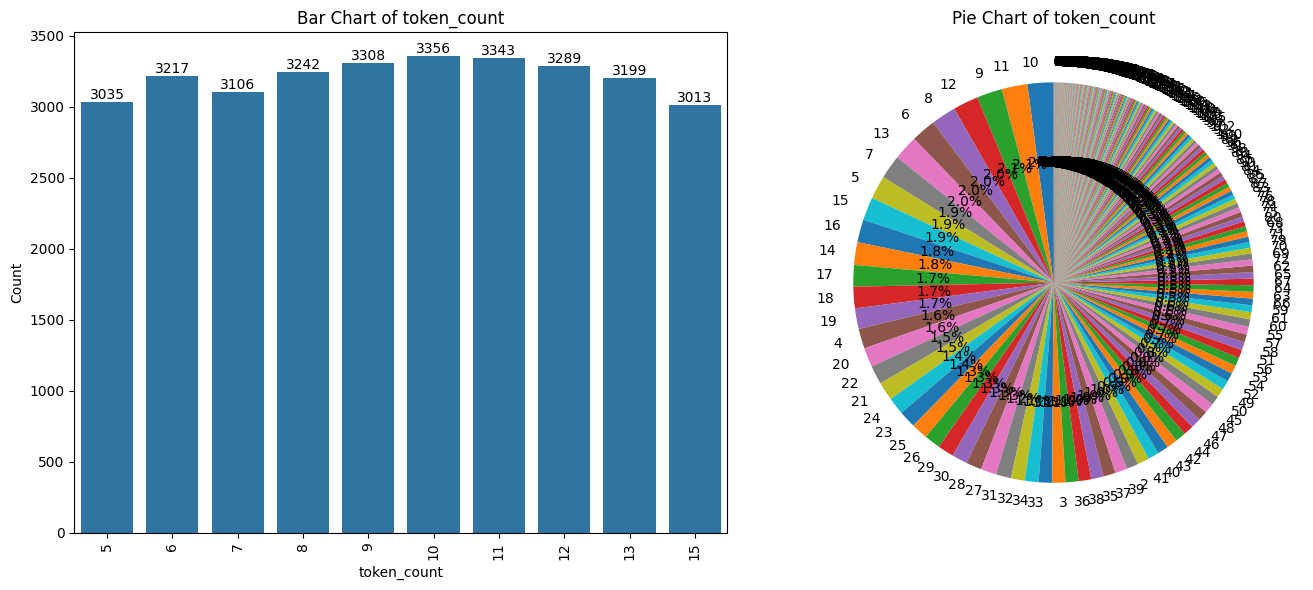

----------------------------------------------------------------------------------------------------

The number of unique values in Month of Response Date: 11

Top 10 values in Month of Response Date:

Aug-23	| Count: 19395	| Percentage: 12.04%
Mar-24	| Count: 15460	| Percentage: 9.59%
Sep-23	| Count: 15308	| Percentage: 9.50%
Nov-23	| Count: 15297	| Percentage: 9.49%
Feb-24	| Count: 15074	| Percentage: 9.36%
Jun-23	| Count: 14940	| Percentage: 9.27%
Jul-23	| Count: 13851	| Percentage: 8.60%
Apr-24	| Count: 13678	| Percentage: 8.49%
Jan-24	| Count: 12904	| Percentage: 8.01%
Dec-23	| Count: 12768	| Percentage: 7.92%


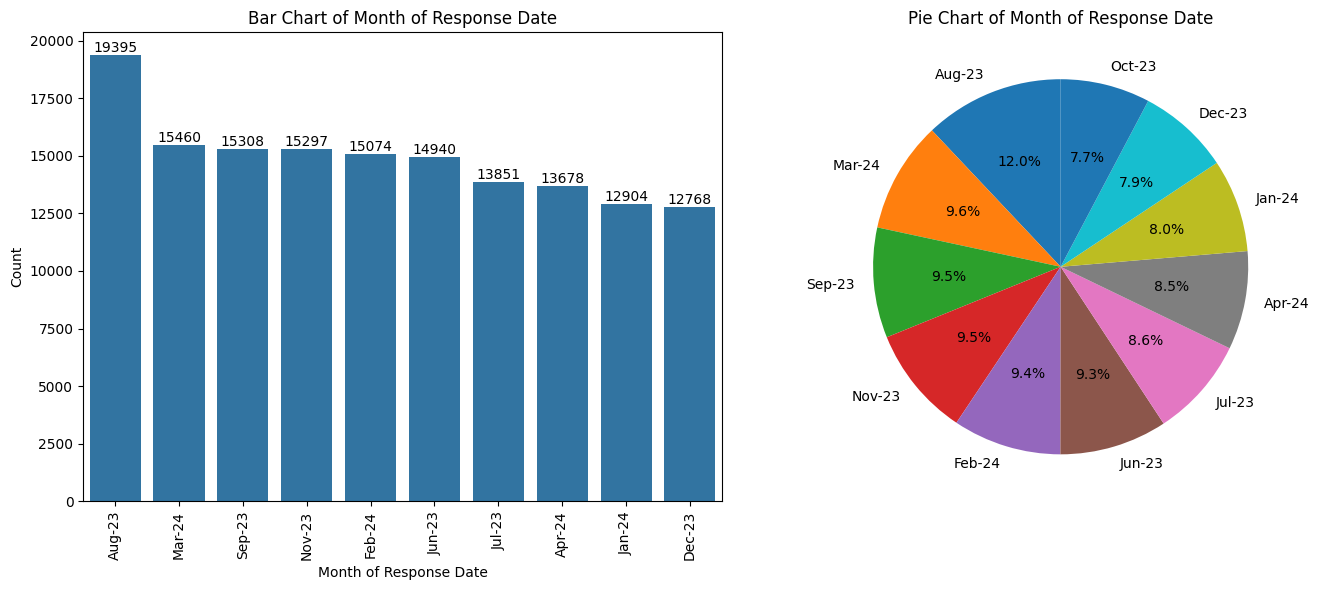

----------------------------------------------------------------------------------------------------



In [166]:
# Specify the columns interested in

# columns_of_interest = ['Product Name', 
#                        'Print Customer Region', 
#                        'LTR', 
#                        'Source Type', 
#                        'Survey language', 
#                        'Review Source', 
#                        'Star Rating', 
#                        'Product Family', 
#                        'Supplies Family', 
#                        'Printer Family', 
#                        'Model Name', 
#                        'predicted_level1', 
#                        'predicted_level2', 
#                        'Ink Supply Type'] 

columns_of_interest = '''
Product Name
Print Customer Region
LTR
Source Type
Survey language
Review Source
Star Rating
Product Family
Supplies Family
Printer Family
Model Name
predicted_level1
predicted_level2
Ink Supply Type
token_count
Month of Response Date
'''.strip().splitlines()

# Get the unique rows from the DataFrame using only the columns of interest
combined_df = combined_df_wdupes[columns_of_interest].drop_duplicates()

# Loop through each column and print unique values with their counts and percentages
for col in columns_of_interest:
    # Get unique count
    unique_count = combined_df[col].nunique()
    print(f"The number of unique values in {col}: {unique_count}\n")
    
    # Get value counts
    value_counts = combined_df[col].value_counts()
    
    # Get top n values
    n = 10
    top_values = value_counts.head(n)
    
    # Total number of entries in the column
    total_count = combined_df[col].count()
    
    print(f"Top 10 values in {col}:\n")
    for value, count in top_values.items():
        percentage = (count / total_count) * 100 if total_count > 0 else 0
        print(f"{value}\t| Count: {count}\t| Percentage: {percentage:.2f}%")
    
    # Plotting
    plt.figure(figsize=(14, 6))

    # Bar Chart
    plt.subplot(1, 2, 1)
    bars = sns.barplot(x=top_values.index, y=top_values.values)
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=90)  # Rotate x labels for better visibility

    # Add data labels on bars
    for bar in bars.patches:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                 int(bar.get_height()), ha='center', va='bottom')

    # Pie Chart
    plt.subplot(1, 2, 2)
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Pie Chart of {col}')

    plt.tight_layout()
    plt.show()

    print("-"*100 + "\n")

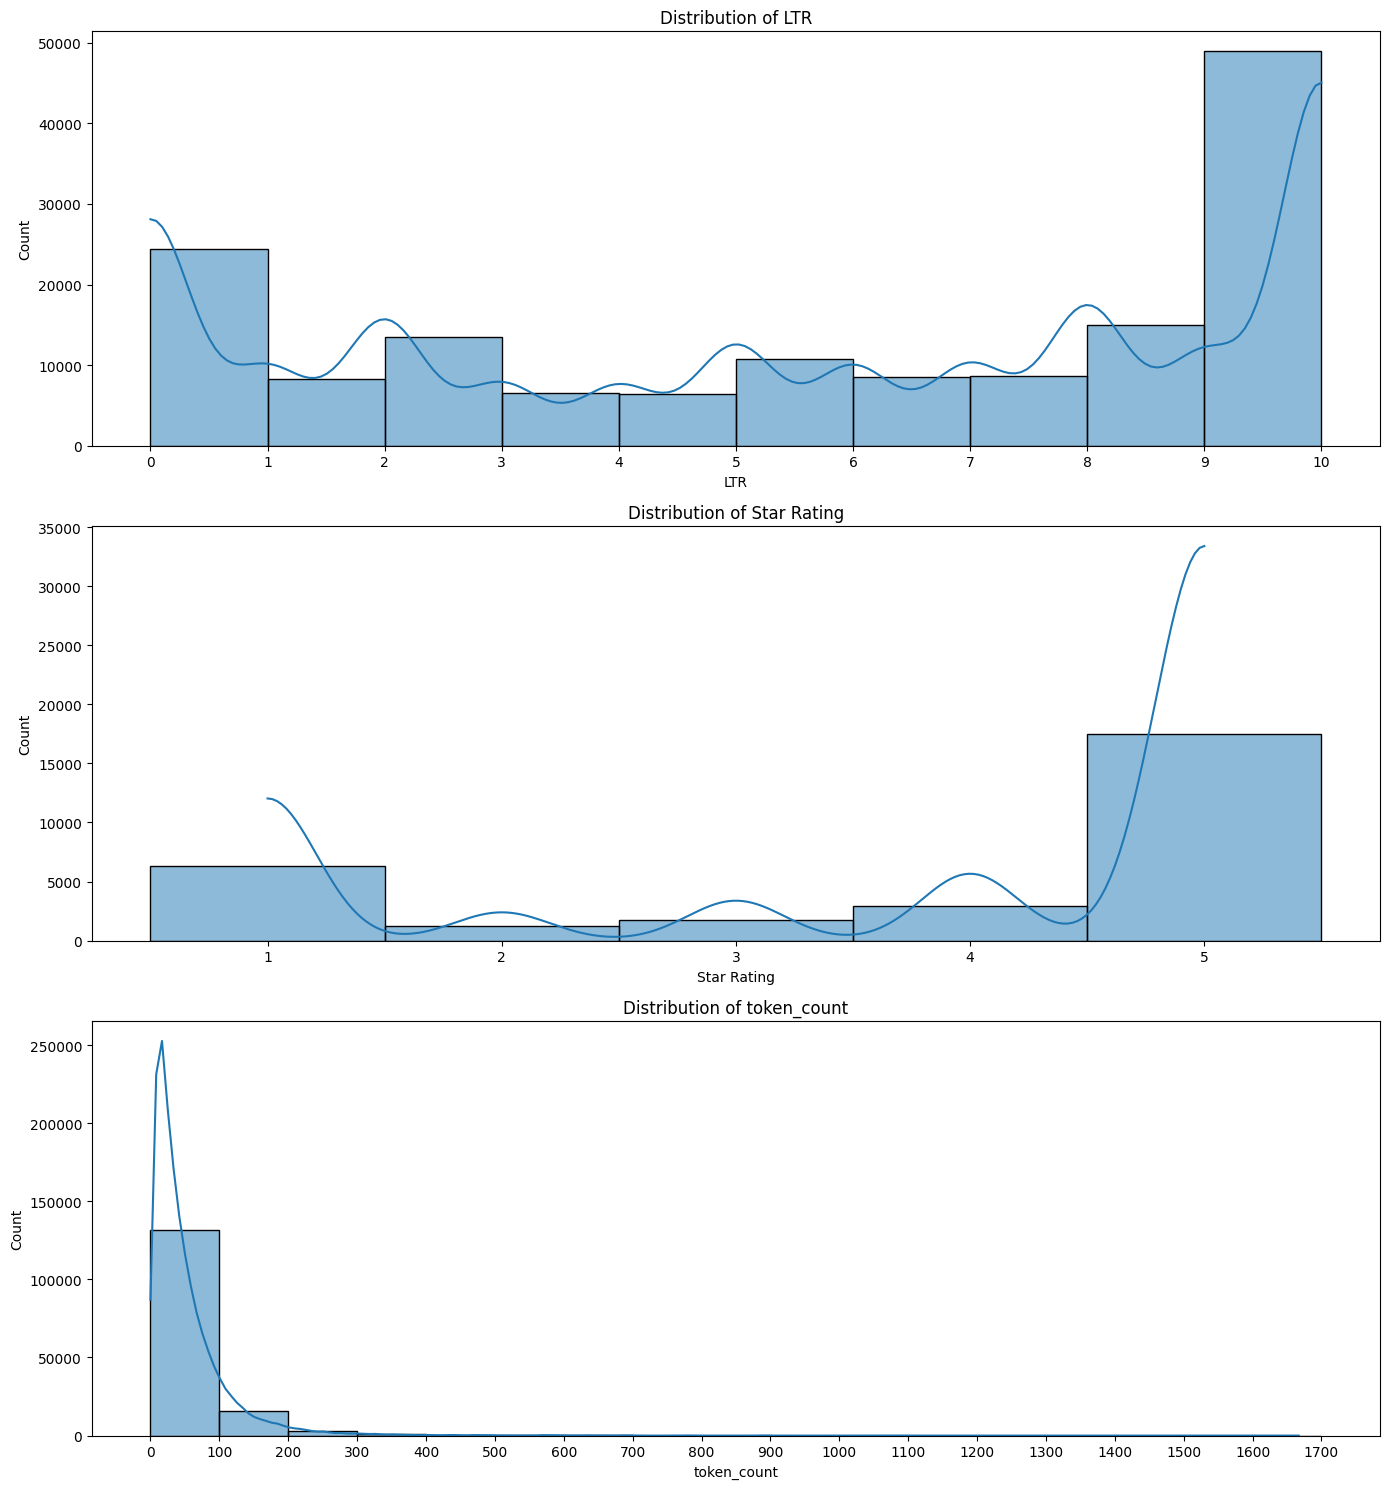

In [153]:
# Convert both 'LTR' and 'Star Rating' to integers, replacing 'null' with NaN for 'Star Rating'
combined_df['Star Rating'] = combined_df['Star Rating'].replace('null', np.nan).astype(float).dropna().astype(int)
combined_df['LTR'] = combined_df['LTR'].astype(int)
combined_df['token_count'] = combined_df['token_count'].astype(int)

# Define the columns for distribution
columns_to_plot = ['LTR', 'Star Rating', 'token_count']

# Create a figure for subplots
plt.figure(figsize=(14, 15))

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(3, 1, i)  # Create a 3x1 grid of subplots
    
    if col == 'Star Rating':
        # Define bins for Star Rating (1 to 5)
        bins = np.arange(0.5, 6.5, 1)  # Bins: 1, 2, 3, 4, 5
        sns.histplot(combined_df[col], bins=bins, kde=True, discrete=True)
        plt.xticks([1, 2, 3, 4, 5])  # Set x-ticks for clarity

    elif col == 'token_count':
        # Plot token_count with bins
        sns.histplot(combined_df[col], bins=range(0, combined_df[col].max() + 100, 100), kde=True)
        plt.xticks(range(0, combined_df[col].max() + 100, 100))  # Set x-ticks in increments of 100

    else:
        # Plot LTR with bins sorted in ascending order
        sns.histplot(combined_df[col], bins=10, kde=True)
        plt.xticks(sorted(combined_df[col].dropna().unique()))  # Set x-ticks for LTR

    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()